In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [90]:
#file = "DataAcquisitionMerging/startup_investment_world_data.xlsx"
file = "DataAcquisitionMerging/requireddata.xlsx"
pd.options.display.float_format = '{:.2f}'.format  # to get rid of large numbers in excel
funding_data = pd.read_excel(file,index=False)
funding_data = funding_data.loc[:, ~funding_data.columns.str.contains('^Unnamed')]


In [91]:
funding_data.head()

,company_name,company_market,company_city,investor_name,investor_market,investor_city,funding_round_type,funded_at,funded_quarter,funded_year,raised_amount_usd
0,Lenovo,Hardware,Morrisville,Chinese Academy Of Sciences,Education,Beijing,undisclosed,1984-01-01,1984-Q1,1984,12663383.67
1,Cisco,Software,San Jose,Sequoia Capital,Venture Capital,Menlo Park,venture,1987-01-01,1987-Q1,1987,2500000.00
2,Office Depot,E-Commerce,Boca Raton,Upfront Ventures,Finance,Los Angeles,undisclosed,1989-06-01,1989-Q2,1989,12663383.67
3,Market Wire,Advertising,El Segundo,Perkins Coie,Legal,Anchorage,venture,1990-11-30,1990-Q4,1990,17550000.00
4,Market Wire,Advertising,El Segundo,Sequoia Capital,Venture Capital,Menlo Park,venture,1990-11-30,1990-Q4,1990,17550000.00


### Find outliars in y= raised_amout_usd

In [92]:
acutal = []
def find_outliers(funding):
    population_mean = funding.mean()
    population_std = funding.std()
    anamoly_cut_off = population_std*3
    
    lower_limit = population_mean - anamoly_cut_off
    upper_limit = population_mean + anamoly_cut_off 
    for outlier in funding:
        if outlier < upper_limit and outlier > lower_limit:
            acutal.append(outlier)
    return acutal;


In [93]:
removed_outliers = find_outliers(funding_data['raised_amount_usd'])
len(removed_outliers)

26080

In [94]:
actual_data = funding_data[funding_data['raised_amount_usd'].isin(removed_outliers)];
filter_funds = pd.DataFrame(actual_data)


In [95]:
filter_funds.head()

,company_name,company_market,company_city,investor_name,investor_market,investor_city,funding_round_type,funded_at,funded_quarter,funded_year,raised_amount_usd
0,Lenovo,Hardware,Morrisville,Chinese Academy Of Sciences,Education,Beijing,undisclosed,1984-01-01,1984-Q1,1984,12663383.67
1,Cisco,Software,San Jose,Sequoia Capital,Venture Capital,Menlo Park,venture,1987-01-01,1987-Q1,1987,2500000.00
2,Office Depot,E-Commerce,Boca Raton,Upfront Ventures,Finance,Los Angeles,undisclosed,1989-06-01,1989-Q2,1989,12663383.67
3,Market Wire,Advertising,El Segundo,Perkins Coie,Legal,Anchorage,venture,1990-11-30,1990-Q4,1990,17550000.00
4,Market Wire,Advertising,El Segundo,Sequoia Capital,Venture Capital,Menlo Park,venture,1990-11-30,1990-Q4,1990,17550000.00


### Lets visulaize the data

#### By looking  scatter plot we can say at tech increase year by year the funding also get increase

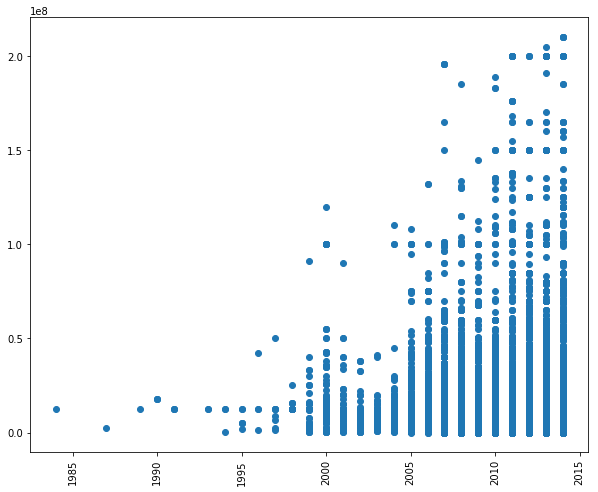

In [96]:
plt.figure(figsize=(10,8))
plt.xticks(rotation='vertical')
plt.scatter(filter_funds['funded_year'],filter_funds['raised_amount_usd'])

#### By looking  scatter plot we can most compnies get higher funds when funding type is 
#### venture
#### debt_financing
#### private_equity


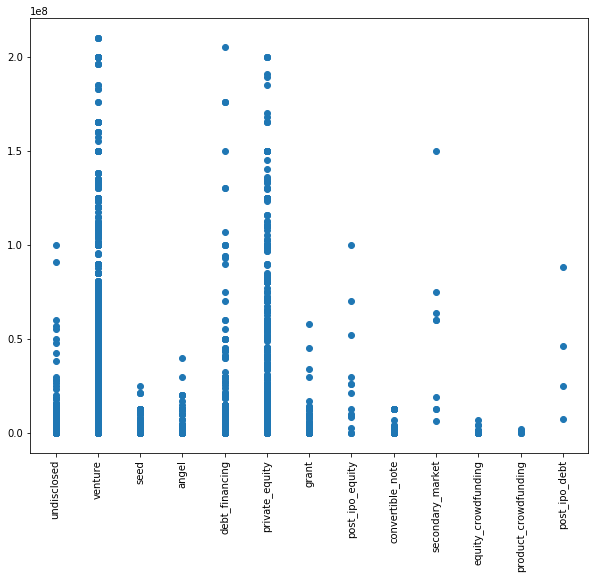

In [97]:
plt.figure(figsize=(10,8))
plt.xticks(rotation='vertical')
plt.scatter(filter_funds['funding_round_type'],filter_funds['raised_amount_usd'])

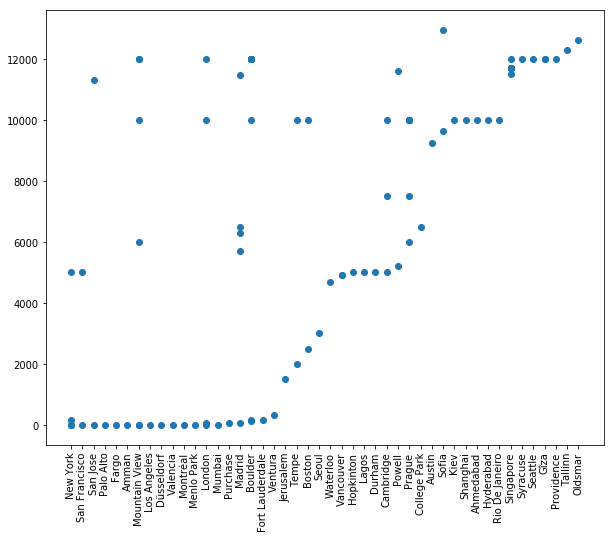

In [98]:
filter_funds.sort_values("raised_amount_usd", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 
top100 = filter_funds.head(100)
plt.figure(figsize=(10,8))
plt.xticks(rotation='vertical')
plt.scatter(top100['investor_city'],top100['raised_amount_usd'])

#### Extract month from 'funded_at' column and drop it 
#### Created new column named as 'funded_month'

In [99]:
filter_funds['funded_month'] = pd.DatetimeIndex(filter_funds['funded_at']).month
filter_funds = filter_funds.drop('funded_at',axis=1)

In [100]:
filter_funds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26080 entries, 25582 to 25845
Data columns (total 11 columns):
company_name          26080 non-null object
company_market        26080 non-null object
company_city          26080 non-null object
investor_name         26080 non-null object
investor_market       26080 non-null object
investor_city         26080 non-null object
funding_round_type    26080 non-null object
funded_quarter        26080 non-null object
funded_year           26080 non-null int64
raised_amount_usd     26080 non-null float64
funded_month          26080 non-null int64
dtypes: float64(1), int64(2), object(8)
memory usage: 2.4+ MB


In [101]:
filter_funds['raised_amount_usd'] = filter_funds['raised_amount_usd'].astype(int)


###### y = raised_amount_usd

##### Convert categorial features to continous variable

In [102]:
dummies = filter_funds
dummies = dummies.drop('company_name',axis=1)

In [103]:
dummies = pd.get_dummies(data=dummies, columns=['funding_round_type','funded_year', 'funded_month'])

#dummies = pd.get_dummies(data=dummies, columns=[ 'funded_year'],prefix='funded_year').iloc[:,1:]


In [104]:
#dummies = dummies.drop([ 'company_city', 'investor_name',
#      'investor_market', 'investor_city', 'funding_round_type',
 #      'funded_quarter', 'funded_month','raised_amount_usd'],axis=1)
    
dummies.head()   

,company_market,company_city,investor_name,investor_market,investor_city,funded_quarter,raised_amount_usd,funding_round_type_angel,funding_round_type_convertible_note,funding_round_type_debt_financing,...,funded_month_3,funded_month_4,funded_month_5,funded_month_6,funded_month_7,funded_month_8,funded_month_9,funded_month_10,funded_month_11,funded_month_12
25582,Marketplaces,New York,Vayner/RSE,Venture Capital,New York,2014-Q4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24084,E-Commerce,Belgrade,StartLabs,Venture Capital,San Francisco,2014-Q2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
25681,Internet Marketing,San Francisco,Adobe Systems,Photo Editing,San Jose,2014-Q4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25685,Internet Marketing,San Francisco,Costanoa Venture Capital,Venture Capital,Palo Alto,2014-Q4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12548,Software,Fargo,Arthur Ventures,Venture Capital,Fargo,2012-Q1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [106]:
X = dummies.drop(['company_market','company_city', 'investor_name',
      'investor_market', 'investor_city',
       'funded_quarter'],axis=1)
#X = dummies
X.head()

,raised_amount_usd,funding_round_type_angel,funding_round_type_convertible_note,funding_round_type_debt_financing,funding_round_type_equity_crowdfunding,funding_round_type_grant,funding_round_type_post_ipo_debt,funding_round_type_post_ipo_equity,funding_round_type_private_equity,funding_round_type_product_crowdfunding,...,funded_month_3,funded_month_4,funded_month_5,funded_month_6,funded_month_7,funded_month_8,funded_month_9,funded_month_10,funded_month_11,funded_month_12
25582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
25681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
y = filter_funds.drop(['company_name','company_market', 'company_city', 'investor_name',
    'investor_market', 'investor_city', 'funding_round_type',
     'funded_quarter', 'funded_year', 'funded_month'],axis=1)
y.head()

,raised_amount_usd
25582,0
24084,0
25681,0
25685,0
12548,0


In [114]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [115]:
predicted_fund = lm.predict(X)
predicted_fund

array([[7.11621814e-08],
       [6.64300976e-08],
       [7.11621814e-08],
       ...,
       [2.10000000e+08],
       [2.10000000e+08],
       [2.10000000e+08]])

In [116]:
len(predicted_fund)

26080

### Linear Plot for actual and predicted data points
### Read points are the actual data point
### Blue line is the predicted one

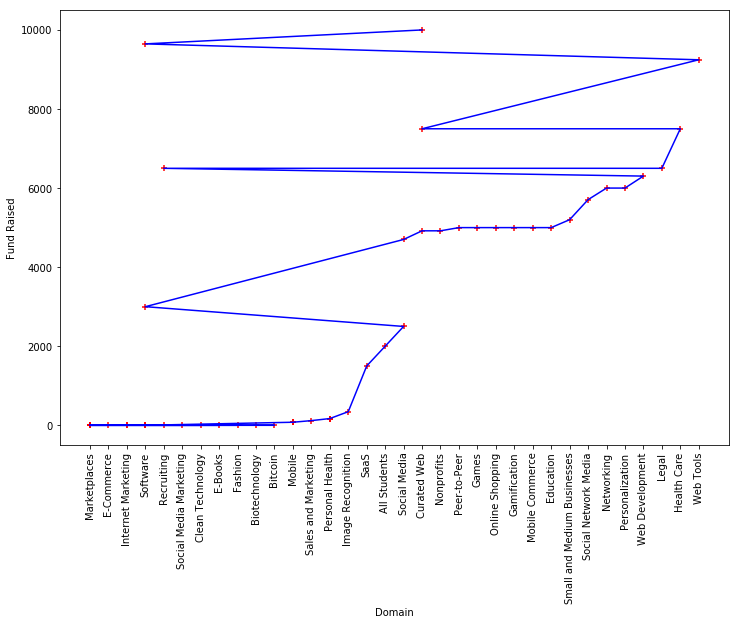

In [117]:
domain = filter_funds.company_market
funding_amnt = filter_funds.raised_amount_usd
plt.figure(figsize=(12,8))
plt.scatter(domain[:50,],funding_amnt[:50,],color='red', marker='+')
plt.plot(domain[:50,],predicted_fund[:50,],color='blue')
plt.xticks(rotation='vertical')
plt.xlabel("Domain")
plt.ylabel("Fund Raised")
plt.show()

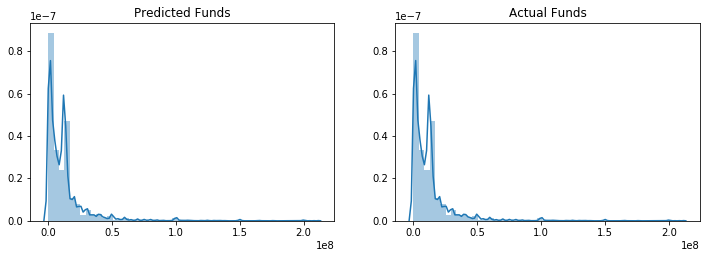

In [118]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(predicted_fund)
plt.title("Predicted Funds")
plt.subplot(2,2,2)
plt.title("Actual Funds")
sns.distplot(y)

In [119]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
print('Number of coefficients: {}'.format(len(lm.coef_)))

Estimated intercept coefficient: [5.21540642e-08]
Number of coefficients: 1


#### The correlation coefficient has values between -1 to 1
##### A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
##### A value closer to 1 implies stronger positive correlation
##### A value closer to -1 implies stronger negative correlation

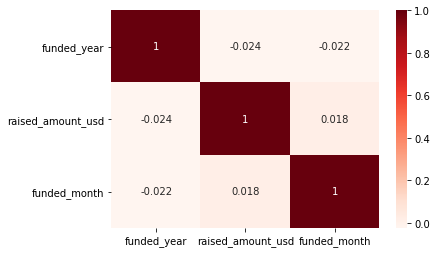

In [120]:
cor = filter_funds.corr()    # These are showing corelation among continues data. To get corelation in categorial data 
                            # need to study how to do it.
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [121]:
lm.score(X,y)

1.0

In [136]:
from sklearn.metrics import explained_variance_score

In [137]:
#print (metrics.accuracy_score(y,predicted_fund))
explained_variance_score(y, predicted_fund)

1.0

In [124]:
from sklearn.model_selection import train_test_split

#### train_test_split will select random train and test data 
#### if you want to don't make it randomize the use  random_state=10

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 

In [126]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [127]:
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [128]:
tr_pred = clf.predict(X_test)
tr_pred

array([[ 1300000.        ],
       [ 7500000.        ],
       [13000000.        ],
       ...,
       [ 4000000.        ],
       [50000000.00000001],
       [ 3165000.        ]])

In [129]:
clf.score(X_test,y_test)

1.0

In [130]:
from sklearn.neighbors import KNeighborsClassifier

In [131]:
knr = KNeighborsClassifier(n_neighbors=1)

In [132]:
knr.fit(X,y)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [133]:
knny_pred = knr.predict(X)

In [134]:
print(metrics.accuracy_score(y,knny_pred))  ## KNN=5

1.0


In [135]:
print(metrics.accuracy_score(y,knny_pred))

1.0
